# The beginning

The objective of the study is to predict solubility from the various features of pressure,salinity and temperature.

The ML workflow is described in the diagram above (Hopefully there will be an ML workflow diagram I can find)

In [439]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [440]:
df=pd.read_excel("C:/Users/Paa Kwasi/Desktop/CO2 solubility Project/CO2 solubility.xlsx")

# Loading the dataset

The data consists of 164 data points with 4 columns for the features and 1 column being solubility as the target for prediction.

In [441]:
df=df.drop(['GA output'], axis=1)
df

,Pressure (atm),Solubility (mol/kg),Salinity (ppm),Salt type,Temperature (K)
0,1.0,0.0330,0,distilled,298
1,20.4,0.6050,0,distilled,298
2,40.8,1.0490,0,distilled,298
3,61.2,1.3490,0,distilled,298
4,81.6,1.3950,0,distilled,298
...,...,...,...,...,...
159,136.1,0.9000,15000,nacl,373
160,156.5,0.9513,15000,nacl,373
161,170.1,0.9835,15000,nacl,373
162,190.5,1.0310,15000,nacl,373


# handling the missing data 

The wholeness of a dataset is necessary in the process of predicting solubility as much as possible as that allows the models to be able to make accurate descriptions. Data handling techniques are of a wide range in dealing with missing data situations but the most common ones are dropping the rows of missing data and filling them in with either the median, mode or mean based on the needs of the project

Data skewing can happen especially with the filling in of data and so must be approached with caution as this can lead to a number of issues such as overfitting or underfitting and also numerical instability during computation of weights in backpropagation process. The dataset consisted of 164 data points with no missing values so it was not required to drop any missing values

In [442]:
df.isnull().count()

Pressure (atm)         164
Solubility (mol/kg)    164
Salinity (ppm)         164
Salt type              164
Temperature (K)        164
dtype: int64

In [443]:
df.dropna(inplace=True)


In [444]:
df.shape

(164, 5)

# Plotting the features against themselves in a scatter matrix

The scatter matrix was used to plot features against themselves to give a visual representation of how the various features correlated they are to each other. Also it helps us identify potential outliers, so as to reduce overfitting and potential computational risks such as numerical instability.

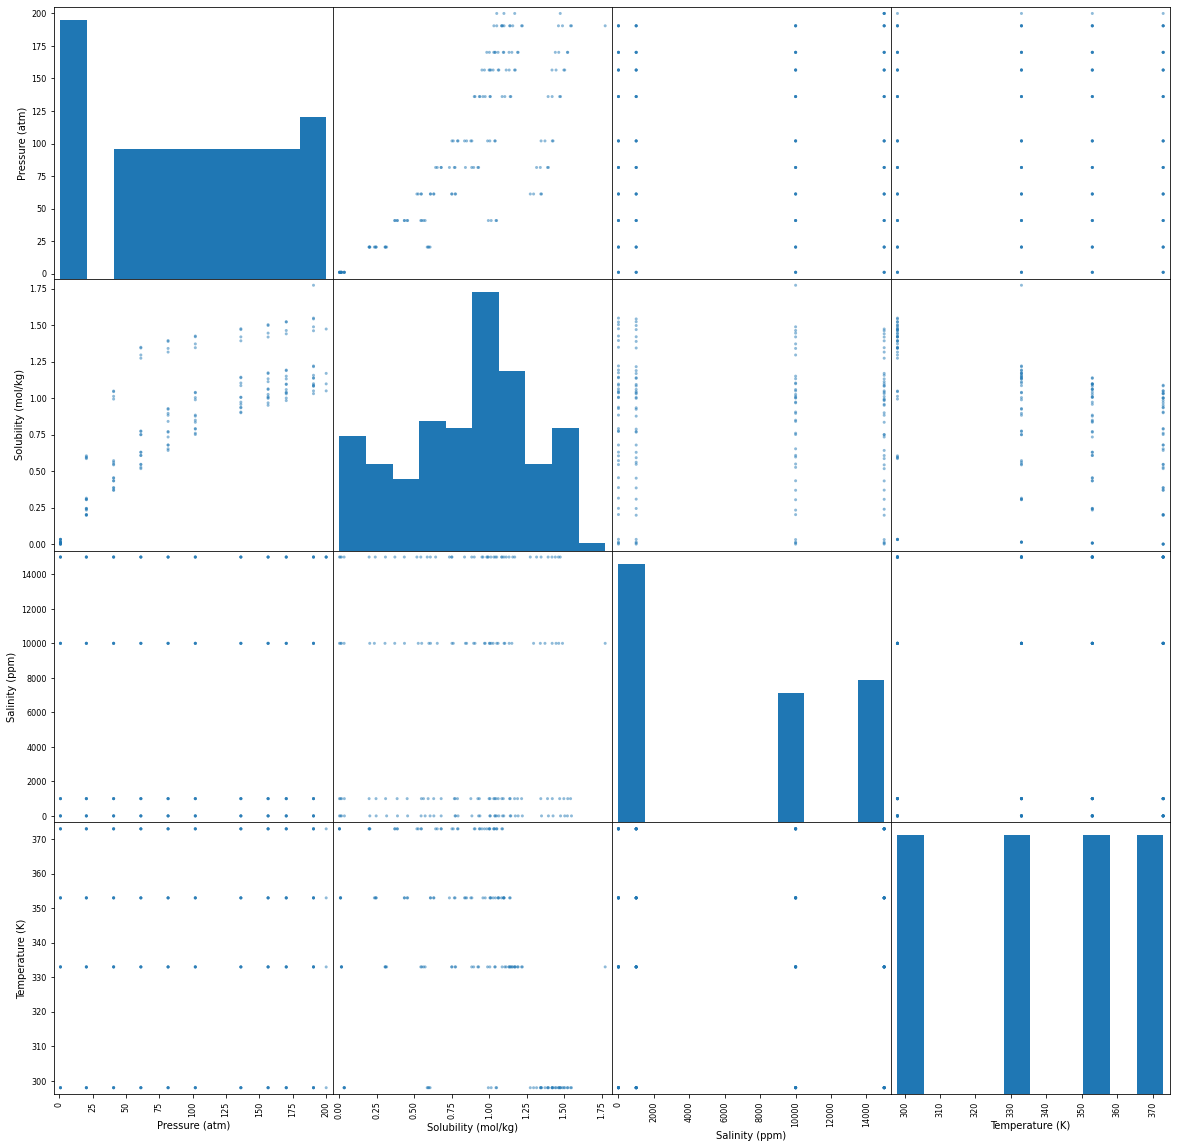

In [445]:
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

### Checking for Collinearity

Multicollinearity tends to casue a multitude of problems including inaccurate advanced statistical testing such as t-test and and p-values by increasing the standard errors. inflating variances. Multicollinearity, in this dataset, was tested for using the Pearson and Spearman correlation with a heatmap to show how the features where correlated with each other. The realtionships with the aid of pairplots and the heatmaps, where used to confirm such highly correlated features so as to avoid inaccurate predictions.

<AxesSubplot:>

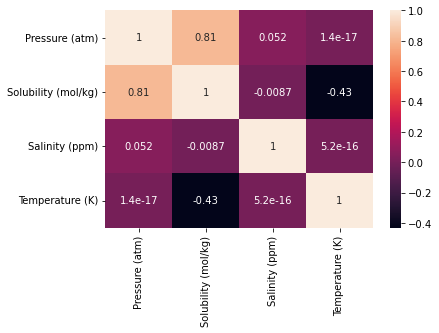

In [446]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

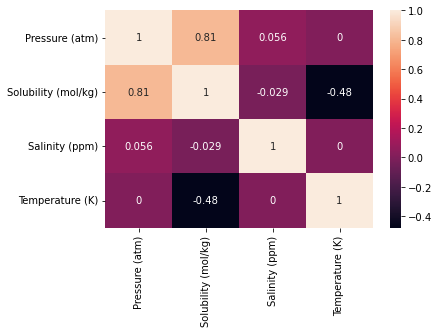

In [447]:
sns.heatmap(df.corr('spearman'),annot=True)

Description the General statistics of the dataset.

In [448]:
df.describe()

,Pressure (atm),Solubility (mol/kg),Salinity (ppm),Temperature (K)
count,164.000000,164.000000,164.000000,164.000000
mean,98.556098,0.849945,6707.317073,339.250000
std,63.877298,0.444213,6344.869537,27.782983
min,1.000000,0.000000,0.000000,298.000000
25%,40.800000,0.548500,1000.000000,324.250000
50%,102.000000,0.963000,10000.000000,343.000000
75%,156.500000,1.140000,15000.000000,358.000000
max,200.000000,1.774000,15000.000000,373.000000


In [449]:
df.shape

(164, 5)

In [450]:
df.columns

Index(['Pressure (atm)', 'Solubility (mol/kg)', 'Salinity (ppm)', 'Salt type',
       'Temperature (K)'],
      dtype='object')

### Splitting the data

The splitting of data was done on the preset configurations of industry standards of 70 percent for training and 30 percent for testing

In [451]:
X=df.drop(['Solubility (mol/kg)','Salt type'],axis=1)
y=df['Solubility (mol/kg)']

#### Data Normalization

Modern day predictive models require normalizing data to a uniform scale as each feature exhibits its own scale and range of point observations.This has beome quite necessary for the improvement of predictive powers of a model. The min-max scaler, commonly known as Normalization. 
$X=\frac{X_i - X_{min}}{X_{max}-X_{min}}$

The min-max scaler was employed to scale all features to a range from 0-1 and this provides a easier point for predictive models to work from, especially those based on measures of distance.

In [497]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1, train_size=0.3)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Searching for the best parameters for svm

In [498]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the parameter grid for random search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
}

# Create a random search object with an SVR model
random_search = RandomizedSearchCV(SVR(), param_distributions=param_grid, n_iter=20)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Make predictions using the best model
y_pred = random_search.predict(X_test)

# Evaluate the model's performance (e.g., mean squared error)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Best parameters: {'gamma': 1, 'epsilon': 0.1, 'C': 10}
Best score: 0.8759968967125195
Mean squared error: 0.013752831970877682


In [499]:
from sklearn.svm import SVR
svr=SVR(C=1000, gamma=1, epsilon=0.01)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform cross-validation on the training data
svr = SVR(C=100, gamma=1, epsilon=0.01)
scores = cross_val_score(svr, X_train_scaled, y_train, cv=8)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# Train the model on the training data
svr.fit(X_train_scaled, y_train)

# Evaluate the model's performance on the testing set
y_pred = svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error on testing set:", mse)

In [500]:
svr.fit(X_train,y_train)
svr.score(X_train,y_train)

0.9995815268628819

In [501]:
svr.score(X_test,y_test)

0.9719621129570045

#### Cross checking with cross validation

In [502]:
 from sklearn.model_selection import cross_val_score

In [503]:
scores=cross_val_score(svr,scaler.fit_transform(X_train),y_train,cv=8)

In [504]:
scores

array([0.97070987, 0.89729612, 0.97154719, 0.91457059, 0.78038566,
       0.90391219, 0.99055699, 0.99565432])

In [505]:
scores.mean() #On average this is how the model is to perform despite random state

0.9280791157091849

In [506]:
svr.fit(X_train,y_train) # Finally concluding with train data
svr.score(X_train,y_train)

0.9995815268628819

In [507]:
svr.score(X_test,y_test) # test data is outperforming training.

0.9719621129570045

# using an ensemble model 

In [508]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset (example for regression)


# Define the parameter grid with distributions
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8,10,12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Create a random search object with a Random Forest regressor
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid, n_iter=10)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Make predictions using the best model
y_pred = random_search.predict(X_test)

# Evaluate the model's performance (e.g., mean squared error)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8}
Best score: 0.9422908968733228
Mean squared error: 0.005626746137898727


# Testing cross validation on the rf 

In [517]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=8,min_samples_leaf=1,min_samples_split=2, n_estimators=200)
scores=cross_val_score(rf,scaler.fit_transform(X_train),y_train,cv=8)

In [518]:
scores

array([0.22667784, 0.77003555, 0.98255479, 0.96694741, 0.98373988,
       0.96984831, 0.97669145, 0.97699156])

In [519]:
scores.mean()

0.8566858484218625

# Final testing on Unseen data 

In [520]:
from sklearn.ensemble import RandomForestRegressor
#rf=RandomForestRegressor(bootstrap=False, max_depth=8,min_samples_leaf=2,min_samples_split=2, n_estimators=200)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=200)

In [521]:
rf.score(X_train,y_train)

0.9962456153729932

In [522]:
rf.score(X_test,y_test)

0.9701182529058676